In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS
from astroquery.skyview import SkyView
from astropy.coordinates import Angle
import time
from astropy.table import Table
import heapq
from math import log10, floor
import matplotlib.mlab as mlab

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
#Region of Sky:

RA=196.875
DE=51.0
RA_length=35.625
DE_length=6.0

#Catalogues:

First_Catalogue_Name='LOTSS'
Second_Catalogue_Name='TGSS'

In [3]:
#Name of Flux in Catalogue..

First_Flux='FTot'
Second_Flux='Stotal'

#And their error
First_Flux_error='e_'+First_Flux
Second_Flux_error='e_'+Second_Flux

In [4]:
# #Getting data from first catalogue

# Vizier.ROW_LIMIT = -1
# First_Catalog_List = Vizier.find_catalogs(First_Catalogue_Name)
# First_Catalogs = Vizier.get_catalogs(First_Catalog_List.keys())
# First_Catalogue_Data=First_Catalogs[0]


# #Getting data from second catalogue

# Second_Catalog_List = Vizier.find_catalogs(Second_Catalogue_Name)
# Second_Catalogs = Vizier.get_catalogs(Second_Catalog_List.keys())
# Second_Catalogue_Data=Second_Catalogs['J/A+A/598/A78/table3']

In [5]:
First_Catalogue_Data= Table.read('data/'+First_Catalogue_Name+'.fit', format='fits')
#print First_Catalogue_Data

Second_Catalogue_Data= Table.read('data/'+Second_Catalogue_Name+'.fit', format='fits')
#print Second_Catalogue_Data

In [6]:
#Making array for first catalogue in region of the sky chosen 


n=0
RA_First=[]
DE_First=[]
Lum_First=[]
RA_First_e=[]
DE_First_e=[]
Lum_First_e=[]
while n< len(First_Catalogue_Data):
    if RA-RA_length<First_Catalogue_Data["RAJ2000"][n] and First_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<First_Catalogue_Data["DEJ2000"][n] and First_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_First.append(First_Catalogue_Data["RAJ2000"][n])
        DE_First.append(First_Catalogue_Data["DEJ2000"][n])
        Lum_First.append(First_Catalogue_Data[First_Flux][n]/1000)
        RA_First_e.append(First_Catalogue_Data["e_RAdegtot"][n]/3600)
        DE_First_e.append(First_Catalogue_Data["e_DEdegtot"][n]/3600)
        Lum_First_e.append(First_Catalogue_Data[First_Flux_error][n]/1000)
    n=n+1

#Making array for second catalogue in region of the sky chosen  
    
n=0
RA_Second=[]
DE_Second=[]
Lum_Second=[]
RA_Second_e=[]
DE_Second_e=[]
Lum_Second_e=[]
while n< len(Second_Catalogue_Data):
    if RA-RA_length<Second_Catalogue_Data["RAJ2000"][n] and Second_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<Second_Catalogue_Data["DEJ2000"][n] and Second_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_Second.append(Second_Catalogue_Data["RAJ2000"][n])
        DE_Second.append(Second_Catalogue_Data["DEJ2000"][n])
        Lum_Second.append(Second_Catalogue_Data[Second_Flux][n]/1000)
        RA_Second_e.append(Second_Catalogue_Data["e_RAJ2000"][n]/3600)
        DE_Second_e.append(Second_Catalogue_Data["e_DEJ2000"][n]/3600)
        Lum_Second_e.append(Second_Catalogue_Data[Second_Flux_error][n]/1000)
    n=n+1
    
    
# #Making array for CV catalogue in region of the sky chosen 
    
# n=0
# RA_CV=[]
# DE_CV=[]
# while n< len(CV_Data):
#     if RA-RA_length<CV_Data["_RAJ2000"][n] and CV_Data["_RAJ2000"][n]<RA+RA_length and DE-DE_length<CV_Data["_DEJ2000"][n] and CV_Data["_DEJ2000"][n]<DE+DE_length:
#         RA_CV.append(CV_Data["_RAJ2000"][n])
#         DE_CV.append(CV_Data["_DEJ2000"][n])
#     n=n+1

/Users/niallbradley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


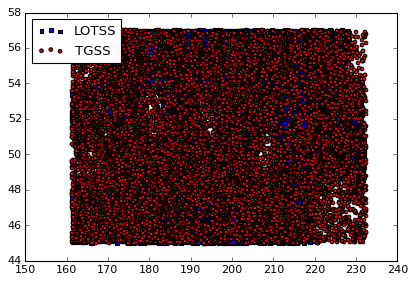

In [7]:
#Plotting coords of two arrays to compare

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_First, DE_First, s=10, c='b', marker="s", label=First_Catalogue_Name)
ax1.scatter(RA_Second,DE_Second, s=10, c='r', marker="o", label=Second_Catalogue_Name)
plt.legend(loc='upper left');
plt.show()

In [8]:
start_time = time.time()
#This loop finds common stars between catalogues:

#Creating new arrays:

#Luminosities of stars in common(and error)
Lum_First_Relevant=[]
Lum_Second_Relevant=[]
Lum_First_Relevant_e=[]
Lum_Second_Relevant_e=[]

#Coordinates of stars in common
RA_First_Relevant=[]
RA_Second_Relevant=[]
DE_First_Relevant=[]
DE_Second_Relevant=[]
RA_First_Relevant_e=[]
RA_Second_Relevant_e=[]
DE_First_Relevant_e=[]
DE_Second_Relevant_e=[]

#Creating new variables

#index for first catalogue:
f=0
#index for second catalogue:
s=0
#number of iterations:
it=0
#Number of stars in both catalogues
corr=1

#While loop goes through all of first catalogue..
while f<len(RA_First):
    #If it compares a source in first catalogue to every source in second without finding one in common then..
    if s==len(RA_Second):
        #It moves on to next source in first and..
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #This is a formula for overlapping circles with the radii being the error
    #If this is true catalogues have that star in common
    elif RA_First_e[f]+RA_Second_e[s]>= abs(RA_First[f]-RA_Second[s]) and DE_First_e[f]+DE_Second_e[s]>= abs(DE_First[f]-DE_Second[s]):
        #print coords and luminosity
#         print corr,":"
#         print First_Catalogue_Name," Coords: (",RA_First[f],",",DE_First[f],")"
#         print First_Catalogue_Name," error: (",RA_First_e[f],",",DE_First_e[f],")"
#         print Second_Catalogue_Name," Coords: (",RA_Second[s],",",DE_Second[s],")"
#         print Second_Catalogue_Name," error: (",RA_Second_e[s],",",DE_Second_e[s],")"
#         print First_Catalogue_Name," Flux:",Lum_First[f]*.001
#         print Second_Catalogue_Name," Flux:",Lum_Second[s]*.001
#         print ""
        #Making arrays of flux of sources in common (and error)
        Lum_First_Relevant.append((Lum_First[f]))
        Lum_Second_Relevant.append(Lum_Second[s])
        Lum_First_Relevant_e.append((Lum_First_e[f]))
        Lum_Second_Relevant_e.append(Lum_Second_e[s])
        
        #Making arrays of coordinates of sources in common 
        RA_First_Relevant.append(RA_First[f])
        RA_Second_Relevant.append(RA_Second[s])
        RA_First_Relevant_e.append(RA_First_e[f])
        RA_Second_Relevant_e.append(RA_Second_e[s])
        DE_First_Relevant.append(DE_First[f])
        DE_Second_Relevant.append(DE_Second[s])
        DE_First_Relevant_e.append(DE_First_e[f])
        DE_Second_Relevant_e.append(DE_Second_e[s])
        
        #Number of common sources increased
        corr=corr+1
        #Move onto next source in first catalogue
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #If neither of these are true then..
    else:
        #Try next source in second catalogue
        s=s+1
    #Before going onto next loop increase number of iterations
    it=it+1
print("--- %s seconds ---" % (time.time() - start_time))

--- 375.430721998 seconds ---


In [9]:
print "Number of iterations:",it
print "Number of stars corrolated:",corr

Number of iterations: 398647014
Number of stars corrolated: 7373


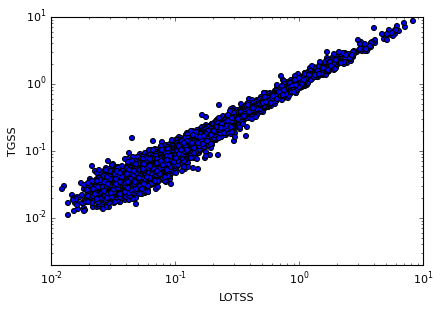

In [10]:
#Plotting Luminosities (unit Jy, log scale)

if corr>0:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(Lum_First_Relevant, Lum_Second_Relevant)
    plt.xlabel(First_Catalogue_Name)
    plt.ylabel(Second_Catalogue_Name)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.01,10)
    plt.ylim(0,10)
    plt.show()

In [11]:
#Defining new variables
Fractional_Diff=0
n=0
m=0
Fractional_Diff_list=[]

#This loop goes through the whole lists of common stars

while n<corr-1:
    
    #Calculates nth fractional change
    Fractional_Diff=(abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n]))/Lum_First_Relevant[n]
    #Creates an array of fractional changes
    Fractional_Diff_list.append(Fractional_Diff)
    n=n+1

#When loop is finished it will have found the biggest change in the list

In [14]:
#FIRST ATTEMPT

size=10

def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

#Create a list of the largest fractional changes in flux:
Largest_Fractional_Diffs=heapq.nlargest(size,Fractional_Diff_list)

#Set new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]
n=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while n<size:
    
    #..creates lists of their indexes and coordinates.
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    Big_Change_indexes.append(ind)
    Big_Change_RAs.append(RA_First_Relevant[ind])
    Big_Change_DEs.append(DE_First_Relevant[ind])
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
    #printing relevant information:
    print n,":"
    print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
    print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
    print "Coordinates:",Big_Change_RAs[n],Big_Change_DEs[n]
    print "Total percentage error:",round_to_1(total_percentage_error)
    
    Simbad_table=Simbad.query_region(coord.SkyCoord(Big_Change_RAs[n], Big_Change_DEs[n],unit=(u.deg, u.deg)),radius='0d0m10s')
    
    if not Simbad_table:
            print "==>no source found on SIMBAD"
    else:
        print Simbad_table["MAIN_ID","RA","DEC"]
    print ""
    print ""
    print ""
    n=n+1


0 :
Change in flux: 2.53010156831 ± 0.3
Respective fluxes: 0.04461628 0.1575
Coordinates: 203.036 47.11892
Total percentage error: 0.1


/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:32:08.64 +47:07:08.112': No astronomical object found :
  (error.line, error.msg))


==>no source found on SIMBAD



1 :
Change in flux: 1.71487944864 ± 0.3
Respective fluxes: 0.02147425 0.0583
Coordinates: 217.38867 47.25709
Total percentage error: 0.2
==>no source found on SIMBAD



2 :
Change in flux: 1.41386324135 ± 0.2
Respective fluxes: 0.02895773 0.0699
Coordinates: 206.76624 46.42481
Total percentage error: 0.1
==>no source found on SIMBAD



3 :
Change in flux: 1.38031032604 ± 0.3
Respective fluxes: 0.01264541 0.0301
Coordinates: 172.18192 47.14743
Total percentage error: 0.2
==>no source found on SIMBAD



4 :
Change in flux: 1.20353437537 ± 0.1
Respective fluxes: 0.04265874 0.094
Coordinates: 229.18089 48.48004
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J151643+482848 15 16 43.20 +48 28 48.0



5 :
Change in flux: 1.20242957567 ± 0.3
Respective fluxes: 0.01216838 0.0268
Coordinates: 217.93641 46.41554
Total percentage error: 0.2


/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:29:33.2808 +47:15:25.524': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:47:03.8976 +46:25:29.316': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:28:43.6608 +47:08:50.748': No astronomical object found :
  (error.line, error.msg))


      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J143144+462457 14 31 44.51 +46 24 57.1



6 :
Change in flux: 1.19419421562 ± 0.3
Respective fluxes: 0.02242281 0.0492
Coordinates: 177.36783 46.36439
Total percentage error: 0.2
==>no source found on SIMBAD



7 :
Change in flux: 1.14764361292 ± 0.3
Respective fluxes: 0.22438546 0.4819
Coordinates: 163.93772 45.40041
Total percentage error: 0.2
      MAIN_ID            RA          DEC     
                      "h:m:s"      "d:m:s"   
------------------- ------------ ------------
NVSS J105545+452401 10 55 44.993 +45 24 01.10



8 :
Change in flux: 1.11716699899 ± 0.2
Respective fluxes: 0.02418326 0.0512
Coordinates: 172.7765 55.3134
Total percentage error: 0.2
==>no source found on SIMBAD



9 :
Change in flux: 1.10524212857 ± 0.1
Respective fluxes: 0.06607316 0.1391
Coordinates: 193.77652 46.69134
Total percentage error: 0.1
      MAIN_ID           

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:49:28.2792 +46:21:51.804': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:31:06.36 +55:18:48.24': No astronomical object found :
  (error.line, error.msg))


In [15]:
#SECOND ATTEMPT
size=50

#Create a list of the largest fractional changes in flux:
Largest_Fractional_Diffs=sorted(Fractional_Diff_list,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    if n>=len(Largest_Fractional_Diffs):
        print "No other sources meet criterea"
        break
    
    #..creates lists of their indexes and coordinates.
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m10s')
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
    if  Simbad_table:
    #printing relevant information:
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        print m,":"
        print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        print Simbad_table["MAIN_ID","RA","DEC"]
        print ""
        print ""
        print ""
        m=m+1
    n=n+1


0 :
Change in flux: 1.20353437537 ± 0.1
Respective fluxes: 0.04265874 0.094
Coordinates: 229.18089 48.48004
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J151643+482848 15 16 43.20 +48 28 48.0



1 :
Change in flux: 1.20242957567 ± 0.3
Respective fluxes: 0.01216838 0.0268
Coordinates: 217.93641 46.41554
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J143144+462457 14 31 44.51 +46 24 57.1



2 :
Change in flux: 1.14764361292 ± 0.3
Respective fluxes: 0.22438546 0.4819
Coordinates: 163.93772 45.40041
Total percentage error: 0.2
      MAIN_ID            RA          DEC     
                      "h:m:s"      "d:m:s"   
------------------- ------------ ------------
NVSS J105545+452401 10 55 44.993 +45 24 01.10



3 :
Change in flux: 1.10524212857 ± 0.1
Respe

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '10:59:17.9472 +45:28:03.792': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:34:13.0464 +53:12:31.428': No astronomical object found :
  (error.line, error.msg))


7 :
Change in flux: 0.930717641666 ± 0.1
Respective fluxes: 0.03946719 0.0762
Coordinates: 215.09163 47.21918
Total percentage error: 0.1
        MAIN_ID               RA          DEC     
                           "h:m:s"      "d:m:s"   
------------------------ ------------ ------------
SDSS J142021.93+471309.0 14 20 21.938 +47 13 09.06
     NVSS J142021+471305  14 20 21.26  +47 13 05.3



8 :
Change in flux: 0.900325690585 ± 0.2
Respective fluxes: 0.02694275 0.0512
Coordinates: 230.01377 48.76511
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J152003+484546 15 20 03.30 +48 45 54.0





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:05:02.2056 +55:16:47.784': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:42:44.2632 +45:06:08.172': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:26:48.5568 +53:48:22.392': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

9 :
Change in flux: 0.810995328782 ± 0.08
Respective fluxes: 0.041745 0.0756
Coordinates: 196.56695 49.70918
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J130616+494234 13 06 16.00 +49 42 33.0



10 :
Change in flux: 0.802274686363 ± 0.08
Respective fluxes: 0.7167054 1.2917
Coordinates: 175.1197 45.01312
Total percentage error: 0.1
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J114028+450046 11 40 28.8 +45 00 47



11 :
Change in flux: 0.794163957839 ± 0.09
Respective fluxes: 1.68786135 3.0283
Coordinates: 194.30698 45.05522
Total percentage error: 0.1
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J125713+450319 12 57 13.7 +45 03 18



12 :
Change in flux: 0.785902957266 ± 0.1
Respective fluxes: 0.02536532 

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:57:18.6048 +46:24:40.212': No astronomical object found :
  (error.line, error.msg))


13 :
Change in flux: 0.773686901398 ± 0.08
Respective fluxes: 0.17753979 0.3149
Coordinates: 229.05897 53.8677
Total percentage error: 0.1
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J151614+535202 15 16 14.1 +53 52 02



14 :
Change in flux: 0.772573435057 ± 0.1
Respective fluxes: 0.02781267 0.0493
Coordinates: 226.94378 52.14562
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J150746+520844 15 07 46.50 +52 08 44.0



15 :
Change in flux: 0.72948341831 ± 0.07
Respective fluxes: 3.99604872 6.9111
Coordinates: 172.91155 45.24733
Total percentage error: 0.1
    MAIN_ID          RA        DEC   
                  "h:m:s"    "d:m:s" 
---------------- ---------- ---------
6C 112856+453123 11 31 38.9 +45 14 51





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:18:27.6768 +49:33:56.34': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:04:56.8632 +55:27:01.476': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:49:59.532 +46:21:43.776': No astronomical object found :
  (error.line, error.msg))


16 :
Change in flux: 0.710341272546 ± 0.08
Respective fluxes: 0.04624808 0.0791
Coordinates: 222.73014 56.6806
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J145055+564050 14 50 55.10 +56 40 50.0



17 :
Change in flux: 0.696446669349 ± 0.1
Respective fluxes: 0.02965021 0.0503
Coordinates: 194.37223 48.66958
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J125729+484017 12 57 29.30 +48 40 10.0



18 :
Change in flux: 0.678511191092 ± 0.1
Respective fluxes: 0.01966028 0.033
Coordinates: 194.84667 49.18087
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J125923+491056 12 59 23.20 +49 10 51.0





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:42:30.2256 +45:14:31.992': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:37:38.9088 +45:16:01.632': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:44:53.7744 +55:40:26.184': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

19 :
Change in flux: 0.638135801458 ± 0.07
Respective fluxes: 0.04199896 0.0688
Coordinates: 187.32631 46.16495
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J122918+460958 12 29 18.30 +46 09 55.0



20 :
Change in flux: 0.611234084466 ± 0.05
Respective fluxes: 0.05709909 0.092
Coordinates: 211.90289 48.62731
Total percentage error: 0.09
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2010] J140736.7+483737 14 07 36.6473 +48 37 37.500





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:07:19.488 +49:19:53.004': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:03:39.5016 +45:50:07.944': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:26:36.4296 +49:36:21.708': No astronomical object found :
  (error.line, error.msg))


21 :
Change in flux: 0.606775768686 ± 0.07
Respective fluxes: 0.06341893 0.1019
Coordinates: 173.4013 46.02953
Total percentage error: 0.1
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2006] J113336.4+460146 11 33 36.3608 +46 01 46.053



22 :
Change in flux: 0.604526542666 ± 0.05
Respective fluxes: 0.06018103 0.0238
Coordinates: 197.51396 53.89665
Total percentage error: 0.08
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2006] J131003.4+535347 13 10 03.3448 +53 53 48.235



23 :
Change in flux: 0.603761682804 ± 0.03
Respective fluxes: 0.2208267 0.0875
Coordinates: 171.05381 51.56387
Total percentage error: 0.05
        MAIN_ID               RA           DEC     
                           "h:m:s"       "d:m:s"   
----------------------- ------------- 

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:36:54.8616 +50:53:09.816': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:16:04.296 +53:05:09.168': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:29.8368 +53:56:02.076': No astronomical object found :
  (error.line, error.msg))


24 :
Change in flux: 0.595833834167 ± 0.05
Respective fluxes: 0.05715471 0.0231
Coordinates: 204.28098 54.9604
Total percentage error: 0.09
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2006] J133707.4+545736 13 37 07.4382 +54 57 37.027



25 :
Change in flux: 0.590985460176 ± 0.07
Respective fluxes: 0.03702108 0.0589
Coordinates: 195.88253 47.61388
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J130331+473651 13 03 31.60 +47 36 51.8



26 :
Change in flux: 0.590260573802 ± 0.08
Respective fluxes: 0.0244614 0.0389
Coordinates: 169.6266 53.88709
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J111830+535318 11 18 30.30 +53 53 13.0



27 :


/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:23:52.9008 +53:28:20.964': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:16:55.1736 +49:18:04.932': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:02:01.0152 +47:34:19.92': No astronomical object found :
  (error.line, error.msg))


31 :
Change in flux: 0.581388170183 ± 0.07
Respective fluxes: 0.06582824 0.1041
Coordinates: 192.59072 45.52547
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J125021+453131 12 50 21.80 +45 31 31.0





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:58:04.956 +48:35:41.82': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:13:02.4768 +54:56:03.984': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:40:45.2904 +51:09:45.864': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning

32 :
Change in flux: 0.570380651656 ± 0.05
Respective fluxes: 0.05609617 0.0241
Coordinates: 201.44887 52.40183
Total percentage error: 0.09
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J132547+522405 13 25 48.00 +52 24 01.0



33 :
Change in flux: 0.56806780331 ± 0.05
Respective fluxes: 0.0688108 0.1079
Coordinates: 170.83853 46.33908
Total percentage error: 0.09
        MAIN_ID              RA        DEC   
                          "h:m:s"    "d:m:s" 
------------------------ ---------- ---------
WISE J112321.31+462021.2 11 23 21.3 +46 20 21



34 :
Change in flux: 0.566024267294 ± 0.06
Respective fluxes: 0.05261732 0.0824
Coordinates: 207.63508 55.09872
Total percentage error: 0.1


/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '15:23:10.1976 +53:01:22.764': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:29:27.432 +56:50:37.536': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:22:02.0088 +55:50:17.448': No astronomical object found :
  (error.line, error.msg))


      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J135032+550556 13 50 32.76 +55 05 56.0



35 :
Change in flux: 0.565164652061 ± 0.1
Respective fluxes: 0.02146739 0.0336
Coordinates: 190.48224 45.89258
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J124155+455328 12 41 55.70 +45 53 32.0





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:07:45.4968 +54:27:28.908': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:19:04.9008 +52:30:23.652': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:11:15.6216 +53:43:56.424': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

36 :
Change in flux: 0.560508434694 ± 0.06
Respective fluxes: 0.04466493 0.0697
Coordinates: 184.8218 53.11435
Total percentage error: 0.1
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J121917+530652 12 19 17.2 +53 06 52



37 :
Change in flux: 0.55622070986 ± 0.02
Respective fluxes: 0.37135577 0.1648
Coordinates: 168.54529 48.31881
Total percentage error: 0.04
  MAIN_ID         RA          DEC     
               "h:m:s"      "d:m:s"   
------------ ------------ ------------
ASASSN -15so 11 14 11.037 +48 19 07.24
   NGC  3583 11 14 10.979 +48 19 06.16



38 :
Change in flux: 0.554706028511 ± 0.04
Respective fluxes: 0.1742669 0.0776
Coordinates: 219.22492 51.33801
Total percentage error: 0.07
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J143654+512018 14 36 54.30 +51 20 18.0





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:34:05.5776 +47:57:05.796': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:40:08.4864 +48:53:32.172': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:43:01.4376 +46:26:39.444': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

39 :
Change in flux: 0.544512389106 ± 0.03
Respective fluxes: 0.12711652 0.0579
Coordinates: 197.38968 53.49405
Total percentage error: 0.06
 MAIN_ID       RA          DEC     
            "h:m:s"      "d:m:s"   
--------- ------------ ------------
NGC  5001 13 09 33.259 +53 29 39.15



40 :
Change in flux: 0.542313265076 ± 0.04
Respective fluxes: 0.0790934 0.0362
Coordinates: 173.72749 49.64828
Total percentage error: 0.07
MAIN_ID     RA        DEC   
         "h:m:s"    "d:m:s" 
------- ---------- ---------
 20P 40 11 34 54.7 +49 38 52



41 :
Change in flux: 0.542216145079 ± 0.1
Respective fluxes: 0.03585749 0.0553
Coordinates: 189.3281 45.4611
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J123718+452743 12 37 18.90 +45 27 41.0





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:25:43.5384 +53:41:26.052': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:41:58.0224 +50:39:10.008': No astronomical object found :
  (error.line, error.msg))


42 :
Change in flux: 0.540532339508 ± 0.05
Respective fluxes: 0.03213175 0.0495
Coordinates: 193.26783 55.01915
Total percentage error: 0.1
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2006] J125304.3+550108 12 53 04.3284 +55 01 08.261



43 :
Change in flux: 0.537764439828 ± 0.05
Respective fluxes: 0.04867648 0.0225
Coordinates: 162.21355 53.51426
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J104851+533048 10 48 51.10 +53 30 50.0



44 :
Change in flux: 0.537536689784 ± 0.06
Respective fluxes: 0.04760862 0.0732
Coordinates: 183.59193 48.78124
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J121422+484653 12 14 22.04 +48 46 53.2



45 

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:01:14.5056 +46:51:32.328': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:57:25.9344 +53:26:00.564': No astronomical object found :
  (error.line, error.msg))


46 :
Change in flux: 0.534885760646 ± 0.05
Respective fluxes: 0.0319242 0.049
Coordinates: 196.94528 49.65762
Total percentage error: 0.1
        MAIN_ID               RA          DEC     
                           "h:m:s"      "d:m:s"   
------------------------ ------------ ------------
SDSS J130747.20+493929.6 13 07 47.207 +49 39 29.69
     NVSS J130747+493931  13 07 47.09  +49 39 31.4



47 :
Change in flux: 0.533290238862 ± 0.05
Respective fluxes: 0.04156759 0.0194
Coordinates: 185.27521 56.40592
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J122106+562420 12 21 06.00 +56 24 20.0



48 :
Change in flux: 0.532441577016 ± 0.08
Respective fluxes: 2.96918334 4.5501
Coordinates: 176.56378 45.34435
Total percentage error: 0.2
MAIN_ID      RA        DEC   
          "h:m:s"    "d:m:s" 
-------- ---------- ---------
4C 45.22 11 46 15.2 +45 20 38



49 :
Change in flux: 0

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '15:13:42.924 +53:45:33.696': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:18:16.1376 +56:18:06.948': No astronomical object found :
  (error.line, error.msg))


In [16]:
#THIRD ATTEMPT

size=20

#Create a list of the largest fractional changes in flux:
Largest_Fractional_Diffs=sorted(Fractional_Diff_list,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    if n>=len(Largest_Fractional_Diffs):
        print "No other sources meet criterea"
        break
    
    #..creates lists of their indexes and coordinates.
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    try:
        Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m10s')
    except EOFError:
        print "EOFError"
        n=n+1
        continue
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
    if  total_percentage_error<=.1:
    #printing relevant information:
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        print m,":"
        print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        if not Simbad_table:
            print "==>no source found on SIMBAD"
        else:
            print Simbad_table["MAIN_ID","RA","DEC","COO_BIBCODE"]
        
        print ""
        print ""
        print ""
        m=m+1
    n=n+1


0 :
Change in flux: 0.810995328782 ± 0.08
Respective fluxes: 0.041745 0.0756
Coordinates: 196.56695 49.70918
Total percentage error: 0.1
      MAIN_ID            RA         DEC         COO_BIBCODE    
                      "h:m:s"     "d:m:s"                      
------------------- ----------- ----------- -------------------
NVSS J130616+494234 13 06 16.00 +49 42 33.0 1997ApJ...475..479W



1 :
Change in flux: 0.658090030701 ± 0.05
Respective fluxes: 0.09300694 0.0318
Coordinates: 183.68359 54.58016
Total percentage error: 0.07
==>no source found on SIMBAD



2 :
Change in flux: 0.657098924163 ± 0.06
Respective fluxes: 0.15368864 0.0527
Coordinates: 186.47155 53.15344
Total percentage error: 0.08
==>no source found on SIMBAD



3 :
Change in flux: 0.619915950369 ± 0.05
Respective fluxes: 0.07051072 0.0268
Coordinates: 201.21004 56.65039
Total percentage error: 0.08
==>no source found on SIMBAD



4 :
Change in flux: 0.611234084466 ± 0.05
Respective fluxes: 0.05709909 0.092
Coordinate

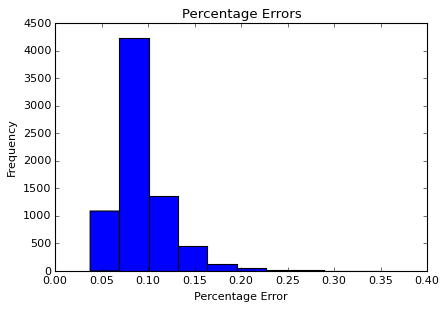

In [17]:
total_percentage_errors_list=[]
n=0
while n<len(Fractional_Diff_list):
    
    #..creates lists of their indexes and coordinates.
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_percentage_errors_list.append(total_percentage_error)
    n=n+1

plt.hist(total_percentage_errors_list)
plt.title("Percentage Errors")
plt.xlabel("Percentage Error")
plt.ylabel("Frequency")


fig = plt.gcf()

/Users/niallbradley/anaconda/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to  1.951e+03 [aplpy.core]
INFO: Auto-setting vmax to  6.448e+03 [aplpy.core]


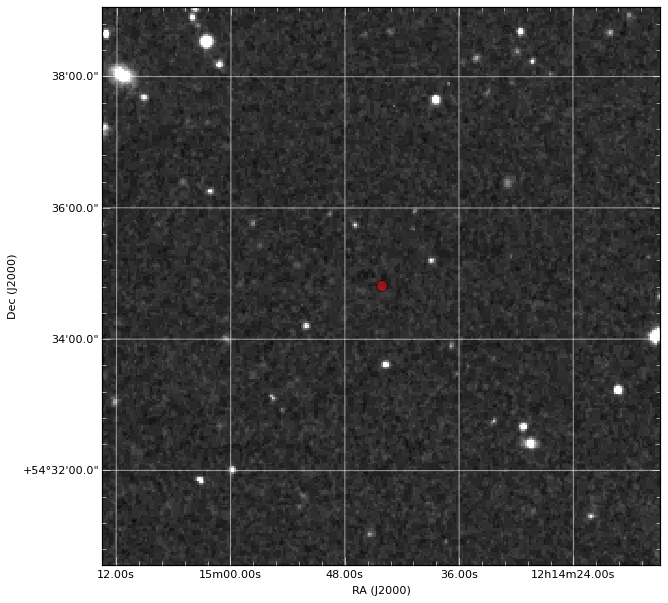

In [18]:
#This displays image of a correlated source

#Which source to show:
x=1

#Coordinates of this star:
pos=coord.SkyCoord(Big_Change_RAs[x]*u.deg, Big_Change_DEs[x]*u.deg)
ra=np.array([Big_Change_RAs[x]])
de=np.array([Big_Change_DEs[x]])
#Find image from DSS:
images = SkyView.get_images(pos,survey=['DSS'])
print images[0]

CV = aplpy.FITSFigure(images[0])


#Gives in grid and makes it grayscale (can also be made colorscale)
CV.show_grayscale()
CV.add_grid()

#This plots a circle where the relevant source should be 
x_pix, y_pix = CV.world2pixel(ra,de)
plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
plt.show()